# Assignment 2
Define a universal color table with a maximum of 256 different colors.

Write an algorithm that transforms the initial pixel values with an index to the color
table so that the return image looks as similar as possible to the original image.

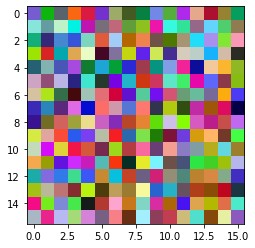

In [258]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

TABLE_SIZE = 256

# Create table of 256 random color
colors = [np.random.choice(range(256), size=3) for _ in range(TABLE_SIZE)]

# Create image that display all the tables
w = int(sqrt(TABLE_SIZE))
img_table = np.array([[colors[x * w + y] for y in range(w)] for x in range(w)], np.uint8)

plt.imshow(img_table)
plt.show()

In [259]:
def color_dist(c1, c2):
   return sum((c1 - c2)**2)

def rgb_2_int(c):
   r, g, b = c
   return (r<<16) + (g<<8) + b

def create_table(source, colors):
   # Create dict with the closest color from table for each pixel
   table = dict()
   for row in source:
      for c in row:
         key = rgb_2_int(c)
         if not key in table:
            table[key] = np.argmin([color_dist(c, color) for color in colors])

   return table

In [260]:
import cv2

# Read image and convert to RGB
source_bgr = cv2.imread("./images/lenna.png")
source = cv2.cvtColor(source_bgr, cv2.COLOR_BGR2RGB)

In [261]:
# Run the preprocess
table = create_table(source, colors)

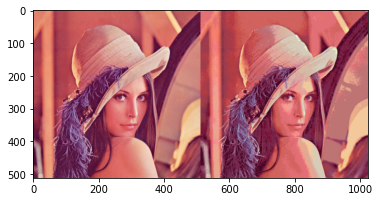

In [271]:
# Create image
img_256 = np.zeros(source.shape, np.uint8)

# Fill image with colors
for x in range(img_256.shape[0]):
   for y in range(img_256.shape[1]):
      img_256[x, y] = colors[table[rgb_2_int(source[x,y])]]

# Concat the 2 images
img_all = cv2.hconcat([source, img_256])

# Save the images
cv2.imwrite("./images/assignment_2_table.png", cv2.cvtColor(img_table, cv2.COLOR_RGB2BGR))
cv2.imwrite("./images/assignment_2.png", cv2.cvtColor(img_all, cv2.COLOR_RGB2BGR))

plt.imshow(img_all)

There is no perfect 256 color palette. There are many ways to do it, some are also handmade. For this exercise I decided to see the result with a palette of 256 colors made in a random way. 

For the transformation of the image into 256 colors, I create a look-up table that takes each pixel of the original image and associates it with the closest color of my palette. To get the closest color, I simply go through the 256 colors and take the one where the distance is minimal. As my palette is not sorted, it takes a lot of time (~45sec).

After finishing the table, I can simply recreate the image.